# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### The dataset we’re working with is the FBI’s National Instant Criminal Background Check System (NICS) dataset, often used in gun-related data analysis.
#### It records the number of firearm background checks by state and month.
#### These checks are used as a proxy for firearm purchases, since federal law requires background checks for most gun sales in the U.S.


## Questions for Analysis

### 1. Is there any relation between owning hand guns and long guns? In other words, do people that own long guns normally have hand guns? 
### 2. Does the relationship between handgun and long gun ownership vary by state (independent variable)?

Now, lets import all needed packages. 

In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [27]:
#load the dataset here.
df=pd.read_csv('gun_data.csv')


here we will get to know more about the dataset to further understand it. 

In [28]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


As we can see in the previous cell, we can grasp a sense of the dataset's general averages and mean values.

This next cell will show more about the structure of the dataset, possible missing values

Here, we can see lots of missing values in multiple columns (permit_recheck, rentals_handgun, and returned_) have a very high number of missing values (over 80% missing in some cases).

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

Now, lets take a look ar the actual dataset and compare.

In [30]:
#preview the dataset 
df.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [31]:
#preview the last few rows to compare with the begginig of the dataset
df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [32]:
# Quick check for suspicious (negative) values only in numeric columns
numeric_df = df.select_dtypes(include=["number"])
print("\nAny negative values?")
print((numeric_df < 0).sum())



Any negative values?
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64


As we can see, no negative values were caught.


### Data Cleaning


Here, I will start investigating missing values (Null values) in the permit column that show the number of permits that were given in a particular state in a particular month. 

In [33]:
# Find indexes of missing values in 'permit'
missing_permit_idx = df[df['permit'].isnull()].index
print("Indexes with missing 'permit' values:", missing_permit_idx.tolist())


Indexes with missing 'permit' values: [7279, 7310, 7804, 7859, 7914, 7969, 8024, 8079, 8134, 8189, 8244, 8299, 8354, 8409, 8491, 9674, 12011, 12066, 12121, 12176, 12231, 12286, 12341, 12396]


Lets fill in these values with the mean of the column.

In [34]:
# Fill missing 'permit' values with the mean
df['permit'] = df['permit'].fillna(df['permit'].mean())


In [35]:
#now lets see if the column has no more missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

# Utilizing functions to reduce redundancy.
Since, there are other columns that will need to be imputated similarily to permit column such as (hand_gun, long_gun, admin) which are transactional columns with handful of missing values. Imputation makes sense here to the context of the dataset. Hence,I will create this function to do the job of showing missing values, and filling them with the mean of that particualr column. 

In [36]:
def fill_missing_with_mean(df, column):
    """
    Finds missing values in a numeric column and fills them with the column's mean.
    
    Parameters:
    df (pd.DataFrame): dataset
    column (str): column name
    
    Returns:
    pd.DataFrame: DataFrame with missing values filled
    """
    missing_idx = df[df[column].isnull()].index
    print(f"Column '{column}' has {len(missing_idx)} missing values at indexes: {list(missing_idx)}")
    
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)
    print(f"Missing values in '{column}' filled with mean value: {mean_val:.2f}")
    return df


In [37]:
# Example for 'admon' column
df = fill_missing_with_mean(df, "admin")

# If other numeric columns also need fixing
df = fill_missing_with_mean(df, "handgun")
df = fill_missing_with_mean(df, "long_gun")


Column 'admin' has 23 missing values at indexes: [7804, 7859, 7914, 7969, 8024, 8079, 8134, 8189, 8244, 8299, 8354, 8409, 8491, 9674, 9960, 12011, 12018, 12066, 12121, 12231, 12286, 12341, 12396]
Missing values in 'admin' filled with mean value: 58.90
Column 'handgun' has 20 missing values at indexes: [7914, 7969, 8024, 8079, 8134, 8189, 8244, 8299, 8354, 8409, 8491, 9674, 12011, 12066, 12121, 12176, 12231, 12286, 12341, 12396]
Missing values in 'handgun' filled with mean value: 5940.88
Column 'long_gun' has 19 missing values at indexes: [7914, 7969, 8024, 8079, 8134, 8189, 8299, 8354, 8409, 8491, 9674, 12011, 12066, 12121, 12176, 12231, 12286, 12341, 12396]
Missing values in 'long_gun' filled with mean value: 7810.85


## I would only use this function for the previous columns as I belive they are the only column that can be imputated without affecting the integerity of the report. 

<a id='eda'></a>
## Exploratory Data Analysis

### Is there any relation between owning hand guns and long guns? In other words, do people that own long guns normally have hand guns? 

In [38]:
#lets focus on both hand, long guns and categorize by the state and the month
# Group by state and month, then select handgun and long_gun

# Filter only year 2000
df_2000 = df[df["month"].str.startswith("2000")]

# Group by state and month, selecting handgun and long_gun
df_grouped_2000 = (df_2000.groupby(["state"])[["handgun", "long_gun"]].sum().reset_index())

# Show results
df_grouped_2000




,state,handgun,long_gun
0,Alabama,81983.0,136767.0
1,Alaska,12714.0,26311.0
2,Arizona,65267.0,64828.0
3,Arkansas,43458.0,116885.0
4,California,328615.0,302746.0
5,Colorado,118000.0,178889.0
6,Connecticut,8.0,4.0
7,Delaware,4948.0,10260.0
8,District of Columbia,17.0,0.0
9,Florida,122562.0,122921.0


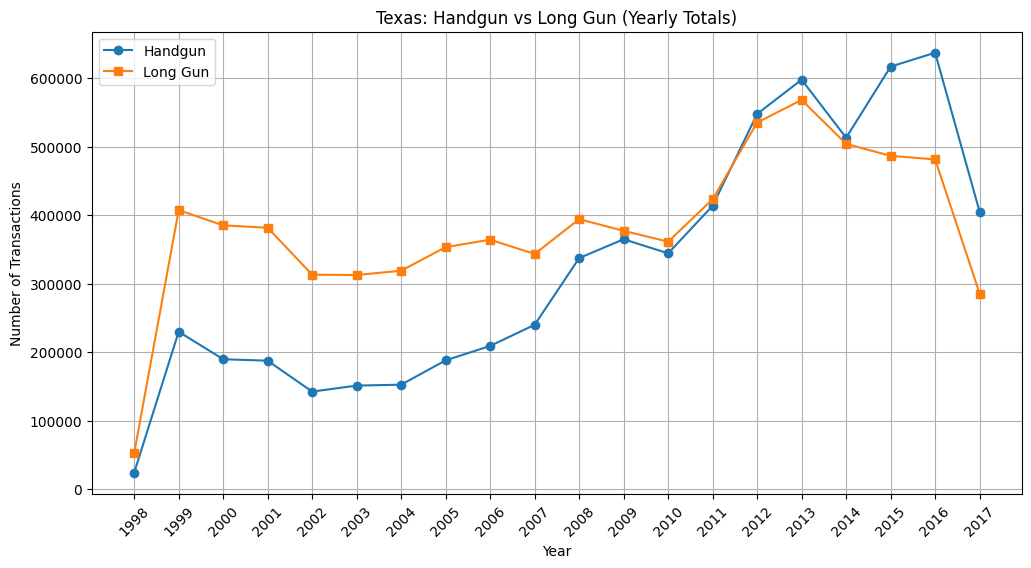

In [39]:
#Let's chosse Texas as an example and preview a yearly timeline (1998-2017) that show handgun vs long_gun owning throughout the years of the dataset. 
import matplotlib.pyplot as plt

# Filter only Texas
df_texas = df[df["state"] == "Texas"].copy()

# Extract year from the 'month' column
df_texas["year"] = df_texas["month"].str[:4]

# Group by year and sum handgun + long_gun
df_texas_yearly = (df_texas.groupby("year")[["handgun", "long_gun"]].sum().reset_index())


# Plot handgun vs long_gun over the years
plt.figure(figsize=(12,6))
plt.plot(df_texas_yearly["year"], df_texas_yearly["handgun"], label="Handgun", marker="o")
plt.plot(df_texas_yearly["year"], df_texas_yearly["long_gun"], label="Long Gun", marker="s")

plt.title("Texas: Handgun vs Long Gun (Yearly Totals)")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")#which indicades buying the gun
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



##     Quick note
    

#### As we can see starting from the year 2011, hand gun transactions exceeded long gun transactions since 1998. 



### Does the relationship between handgun and long gun ownership vary by state (independent variable)?

In [ ]:
# Group data by state (across all years) and sum
df_state_totals = df.groupby("state")[["handgun", "long_gun"]].sum().reset_index()

# Scatter plot: Handgun vs Long Gun totals by state, colored by state
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_state_totals, x="long_gun", y="handgun", 
    hue="state",       # color by state
    palette="tab20",   # choose a diverse color palette to differentiate between states
    s=120              # make dots larger for better visibility
)

# Add labels and legend
plt.title("Handgun vs Long Gun Totals by State", fontsize=16)
plt.xlabel("Long Gun Transactions", fontsize=12)
plt.ylabel("Handgun Transactions", fontsize=12)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")  # place legend outside

plt.show()


# Quick note
### it can be noted that there is a positive corelation between owning handguns and long guns across all states.

<a id='conclusions'></a>
## Conclusions

### As a conclusion: Long gun transactions, which indicate ownership of long guns, have consistently exceeded handgun ownership up until the year 2011, then handguns became more common to be owned, which is interesting to me. I always thought that handguns were more common.

### Additionally, looking at the second plot, we can see a positive correlation between handguns and long gun transactions. However, that doesn't mean causation. There are a lot of factors that can be considered, but due to the limitation of this report, we won't be considering them, as we only consider the dataset.  

### I would like to mention that this report is limited to the dataset provided by the FBI for guns in the USA. Additionally, the first plot shows the total transactions across all states for both handguns and long guns concerning time (1998 - 2017). That doesn't take into consideration each state and its significantly different populations. So, it's mainly a general visualization of gun transactions across the US.  


# Additional research and resources that can add to the analysis: 
### For better analysis, and more accurate results, information about each state's population throughout all these years will greatly reflect on the analysis by providing more streamline polts, accurate details, and more room for analysis.


In [21]:
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 609785 bytes to Investigate_a_Dataset.html
